# Restaurants Data Analysis Project

### This project aims to analyze a dataset containing restaurant information. The analysis focuses on various aspects, such as the distribution of ratings, the relationship between votes and ratings, the availability of online delivery and table booking across different price ranges, and idenfitying common positive and negative keywords in text reviews.

### Importing necessary libraries for data analysis & visualization

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the restaurant dataset into a Data Frame

In [15]:
df = pd.read_csv("D:\Python Code Files\Downloads\Zomato Dataset.csv")

In [16]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#### Initial Data Exploration :

In [17]:
#Displaying the basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [18]:
#Checking for missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [19]:
#Statistical summary of Dataset
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Level 1 :
##### Task 1 : Top Cuisines

##### Determine the top three most common Cuisines in the Dataset

In [20]:
#Count the each Cuisines
cuisine_counts = df['Cuisines'].str.split(', ').explode().value_counts()

#Get the top 3 most common Cuisines
top_3_cuisines = cuisine_counts.head(3)

#Print the top 3 Cuisines
print("Top 3 most Common Cuisines :")
print(top_3_cuisines)

Top 3 most Common Cuisines :
North Indian    3960
Chinese         2735
Fast Food       1986
Name: Cuisines, dtype: int64


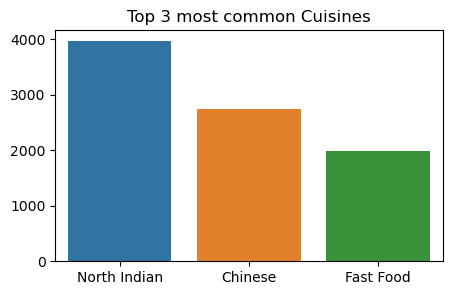

In [38]:
plt.figure(figsize=(5,3))
sns.barplot(x= top_3_cuisines.index, y= top_3_cuisines.values)
plt.title("Top 3 most common Cuisines")
plt.show()

#### Calculate the percentage of restaurants that serve each of the top Cuisines

In [22]:
#Calculate the percentage of restaurants serving each Cuisine
total_restaurants = len(df)
cuisine_percentage = (cuisine_counts/total_restaurants)*100

#print the percentage of restaurants serving each Cuisine
print("Percentage of restaurants serving each Cuisines :")
top_5_pct = cuisine_percentage.head(5)
print(top_5_pct)

Percentage of restaurants serving each Cuisines :
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Mughlai         10.417757
Italian          7.999162
Name: Cuisines, dtype: float64


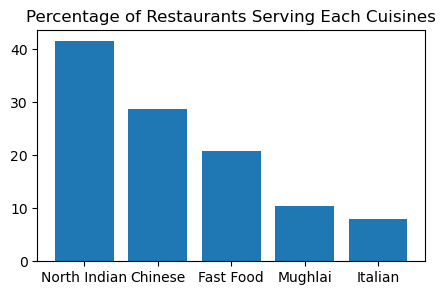

In [23]:
plt.figure(figsize=(5,3))
plt.bar(top_5_pct.index, top_5_pct.values)
plt.title("Percentage of Restaurants Serving Each Cuisines")
plt.show()

#### Task 2 : City Analysis

#### Identify the city with highest number of Restaurants in the dataset.

In [24]:
city = df.groupby('City')['Restaurant ID'].count().sort_values(ascending=False)
city.head(1)

City
New Delhi    5473
Name: Restaurant ID, dtype: int64

#### Calculate the average rating for Restaurants in each City

In [25]:
avg_rating = df.groupby('City')['Aggregate rating'].mean()
avg_rating

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

#### Task 3 : Price Range Distribution

#### Create a Histogram or Bar Chart to Vizualize the distribution of price ranges among the restaurants.

In [26]:
count_price_range = df['Price range'].value_counts()
count_price_range

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

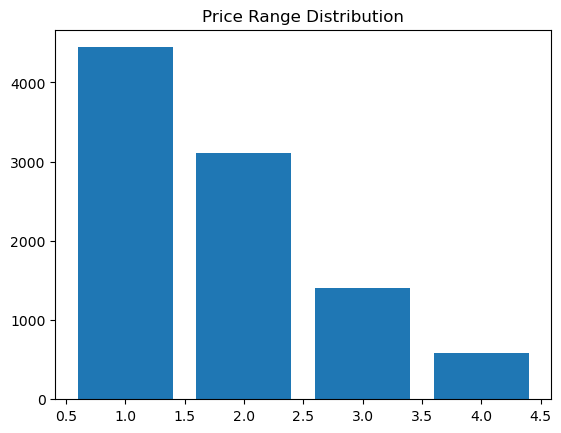

In [27]:
plt.figure.figsize = (5,3)
plt.bar(count_price_range.index, count_price_range.values)
plt.title('Price Range Distribution')
plt.show()

#### Calculate the percentage of Restaurants in each Price range Category

In [28]:
pct_price_range = (df['Price range'].value_counts()/len(df))*100
pct_price_range

1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: Price range, dtype: float64

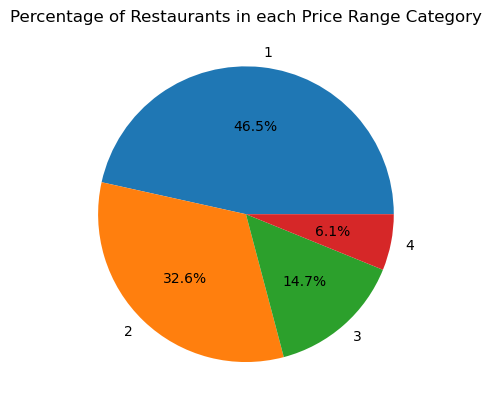

In [29]:
plt.figure.figsize = (5,3)
plt.pie(pct_price_range, labels=pct_price_range.index, autopct='%1.1f%%')
plt.title('Percentage of Restaurants in each Price Range Category')
plt.show()

#### Task 4 : Online Delivery

#### Determine the percentage of Restaurants that offer Online Delivery

In [30]:
compare_avg_rating = df.groupby('Has Online delivery')['Aggregate rating'].mean()
compare_avg_rating

Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64

### Conclusion :

This project involved a comprehensive analysis of a restaurant dataset, which included various attributes such as Restaurants Names, City Locations, Ratings, & Cost for two.

### Level 2

#### Task 1 : Restaurant Ratings

##### Analyze the distribution of Aggregate ratings and determines the most common rating range.

In [31]:
Avg_rating_range = df['Aggregate rating'].value_counts()
Avg_rating_range

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

#### Identify the most common combination of Cuisines in the Dataset

In [32]:
most_common_cuisine = df['Cuisines'].value_counts()
most_common_cuisine.head(5)

North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64

#### Determines if certain cuisine combination tend to have higher ratings

In [33]:
high_ratings = df.groupby('Cuisines')['Aggregate rating'].count().sort_values(ascending= False)
high_ratings

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Continental, Italian, North Indian, Lebanese, Thai         1
Continental, Italian, North Indian, Lebanese               1
Continental, Italian, North Indian, Chinese, Lebanese      1
Continental, Italian, North Indian, Chinese                1
World Cuisine, Patisserie, Cafe                            1
Name: Aggregate rating, Length: 1825, dtype: int64

#### Task 3 : Geographic Analysis

##### According to task 3 question(geographic analysis) so there is need of map visualization, we can't analyze this task in Python tool.

#### Task 4 : Restaurant Chains

#### Identify if there are any restaurant chains present in the dataset.

In [34]:
restaurant =df['Restaurant Name'].value_counts()
restaurant_chains = restaurant[restaurant > 1]
restaurant_chains

Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: Restaurant Name, Length: 734, dtype: int64

#### Analyze the ratings and popularity of different restaurant chains

In [40]:
# Filter the dataset to include only restaurant chains
chains_data = df[df['Restaurant Name'].isin(restaurant_chains.index)]
                 
# Group by Restaurant Name & calculate average rating & total votes
chains_stats = chains_data.groupby('Restaurant Name').agg({'Aggregate rating': 'mean', 'Votes':'sum'}).reset_index()

#Sort by average rating and total votes for analysis
chains_stats = chains_stats.sort_values(by=['Aggregate rating', 'Votes'], ascending=[False, False])
                 
# Display the top restaurant chains by rating and popularity
print(chains_stats.head(10))

               Restaurant Name  Aggregate rating  Votes
629           Talaga Sampireun             4.900   5514
8      AB's Absolute Barbecues             4.850   3151
589           Silantro Fil-Mex             4.850   1364
7    AB's - Absolute Barbecues             4.825  13400
449         Naturals Ice Cream             4.800   3094
293                   Gymkhana             4.700    328
653     The Cheesecake Factory             4.650   3010
218                    Dishoom             4.600   1269
267          Garota de Ipanema             4.600     59
163                    Chili's             4.580   8156


### Conclusion :

This project involved a comprehensive analysis of a restaurant dataset, which included various attributes such as restaurants names, city locations, ratings & cost for two.